In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist
%matplotlib inline


In [3]:
data=pd.read_csv('Q11_Cluster.csv')
data.head()

,recordID,Level,Q11r1,Q11r2,Q11r3,Q11r4,Q11r5,Q11r6,Q11r7,Q11r8,Q11r9,Q11r10,Q11r11,Q11r12,Q11r13,Q11r14,Q11r15,Q11r16,Q11r17
0,7,6,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0
1,8,6,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
2,9,3,0,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,0
3,10,6,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
4,11,4,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0


In [4]:
data2=data.drop(['recordID','Level'],axis=1)
data2

,Q11r1,Q11r2,Q11r3,Q11r4,Q11r5,Q11r6,Q11r7,Q11r8,Q11r9,Q11r10,Q11r11,Q11r12,Q11r13,Q11r14,Q11r15,Q11r16,Q11r17
0,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0
1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
2,0,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,0
3,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0
897,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1
898,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0


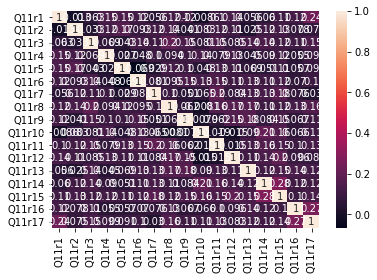

In [5]:
corrMatrix = data2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

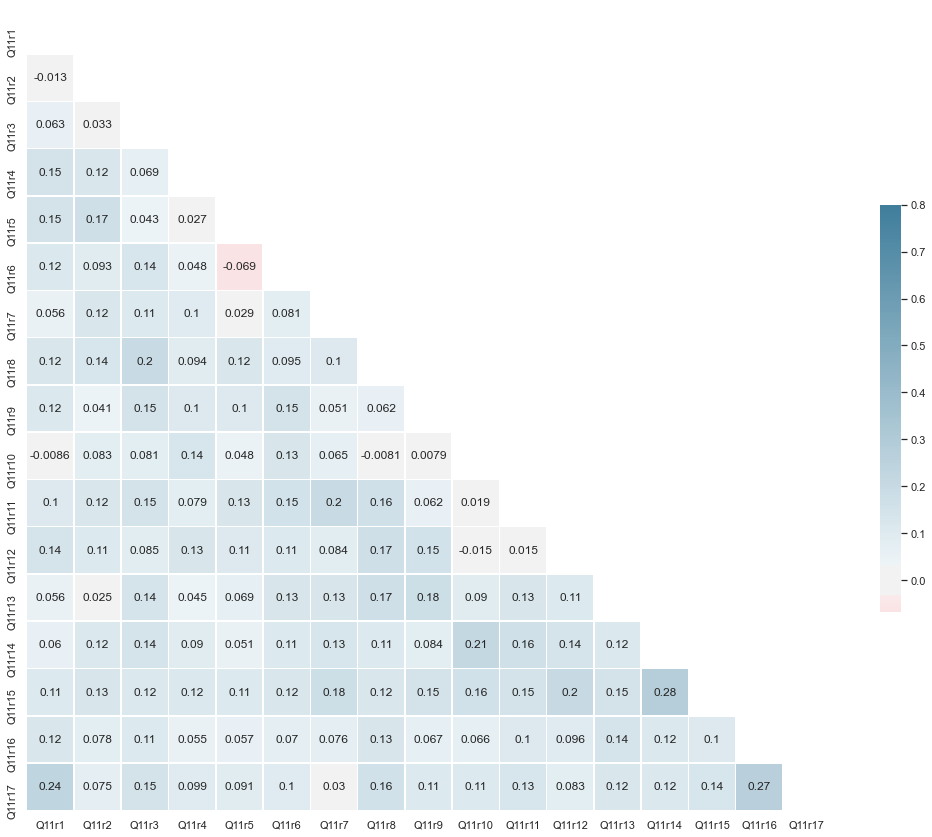

In [22]:
sns.set(style="white")

# Compute the correlation matrix
corr = data2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
from sklearn.cluster import KMeans

In [24]:
km=KMeans(n_clusters=3,max_iter=1000)

In [25]:
km.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
km.cluster_centers_

array([[7.00000000e-01, 7.30000000e-01, 8.65000000e-01, 6.25000000e-01,
        4.75000000e-01, 6.85000000e-01, 6.70000000e-01, 7.20000000e-01,
        6.65000000e-01, 4.20000000e-01, 6.35000000e-01, 5.85000000e-01,
        6.90000000e-01, 6.75000000e-01, 6.10000000e-01, 5.20000000e-01,
        4.45000000e-01],
       [3.55231144e-01, 4.27435864e-15, 3.84428224e-01, 2.84671533e-01,
        2.28710462e-01, 3.01703163e-01, 3.33333333e-01, 2.84671533e-01,
        3.04136253e-01, 2.33576642e-01, 2.57907543e-01, 2.23844282e-01,
        3.09002433e-01, 2.53041363e-01, 1.84914842e-01, 2.18978102e-01,
        1.28953771e-01],
       [2.69896194e-01, 1.00000000e+00, 2.76816609e-01, 3.21799308e-01,
        3.46020761e-01, 3.04498270e-01, 3.77162630e-01, 3.42560554e-01,
        2.38754325e-01, 2.38754325e-01, 2.24913495e-01, 2.49134948e-01,
        2.04152249e-01, 2.28373702e-01, 2.11072664e-01, 2.04152249e-01,
        1.21107266e-01]])

In [27]:
km.labels_

array([0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0,
       1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0,
       1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2,

In [32]:
data['predicted_label']=km.labels_
data

,recordID,Level,Q11r1,Q11r2,Q11r3,Q11r4,Q11r5,Q11r6,Q11r7,Q11r8,Q11r9,Q11r10,Q11r11,Q11r12,Q11r13,Q11r14,Q11r15,Q11r16,Q11r17,predicted_label
0,7,6,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,0,0,0
1,8,6,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,2
2,9,3,0,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0
3,10,6,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1
4,11,4,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2864,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
896,2868,6,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
897,2883,6,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0
898,2891,6,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1


In [33]:
#Export to CSV
data.to_csv ('clusters.csv', index = False, header=True)

In [29]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2)
    kmeanModel.fit(data2)     
      
    distortions.append(sum(np.min(cdist(data2, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data2.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data2, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data2.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


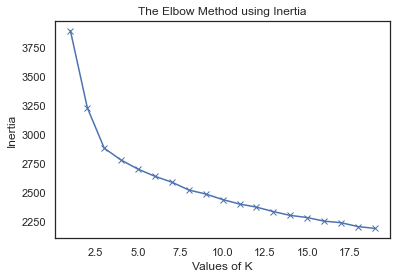

In [30]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

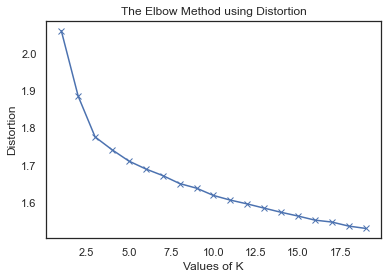

In [31]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 